# AASD 4011 - Mathematical Concepts for Deep Learning Final Project 
<hr>

## Members: 

1. Michelle Ohikhena (101428168) 
2. Megi Xhafka (101445718)

<hr>

## Topic

***Fine-tuning LSTM Model for Sentiment Analysis on IMDb Movie Reviews: Exploring the Impact of Weight Initializers and Optimizers***
<hr>

## Problem statement

Sentiment analysis plays a crucial role in understanding public opinion and feedback. By exploring and ***comparing*** different ***weight initializers*** and ***optimizers***, we can gain insights into how these hyperparameters affect the performance of the LSTM model for sentiment analysis on the IMDb dataset. The analysis will provide valuable information on which combinations of weight initializers and optimizers yield the best results, enabling us to make informed decisions for model selection and fine-tuning.

<hr>

## Dataset

The link to the dataset found on kaggle is: [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?sele=&select=IMDB+Dataset.csv) which contains 50,000 reviews.

<hr>

#### Importing the neccesary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, LSTM, Bidirectional

## **Data Exploration & Preprocessing**

<hr>

##### Loading the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
data = pd.read_csv("dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<hr>

#### The dataset contains 50.000 rows and 2 columns: "review" that are all the sentences and "sentiment" that is a categorical label with 2 values ***positive*** and ***negative***.
#### Now we will explore the dataset and start preprocessing to make it ready for our code.

<hr>

In [4]:
#Number of rows and columns
data.shape

(50000, 2)

In [5]:
#Looking for null values
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
#Looking at a review example to get more insights
data['review'][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

<hr>

##### As we can see from this review example, there are a lot of stopwords, html tags <>, punctuations, numbers, and other symbols that are unuseful. In the lines below, we will encode the sentiment into 1 -> positive and 0 -> negative, and preprocess the text sentences in order to have better results.

In [7]:
#Encoding the sentiment
data['sentiment'] = data['sentiment'].apply(lambda x: 0 if x == 'negative' else 1) 

In [8]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
#Doing the preprocessing of review sentences as mentioned before

stop_words = stopwords.words('english')

def textpreprocess(s):
    words = [] # empty list
    
    s = s.strip().lower() # making the text lowercase
    s = re.sub('\[.*?\]', '', s) # removes unuseful symbols (.*?\)
    s = re.sub('https?://\S+|www\.\S+', '', s) # remove URLS
    s = re.sub('<.*?>+', '', s)
    s = re.sub('[%s]' % re.escape(string.punctuation), '', s) # remove punctuations
    s = re.sub('\n', '', s) # remove next line character
    s = re.sub('\w*\d\w*', '', s)
    
    words = s.split() # split the string into list of words
    words = [word for word in words if word not in stop_words] # removing stop words
    s = ' '.join(words) # converting list to string
    
    return s

In [11]:
#Applying the preprocess

data['preprocessed'] = data['review'].apply(textpreprocess)

In [12]:
#Preprocessed text will be on a new column

data.head()

,review,sentiment,preprocessed
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...


In [13]:
#Looking at a preprocessed review to see how it looks like after preprocessing

data['preprocessed'][4]

'petter matteis love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzlers play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitatthe thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounterthe acting good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alivewe wish mr mattei good luck await anxiously next work'

<hr>

## **Visualizations**

#### The dataset is cleaned and ready to use. These visualizations will make us get more insights on the dataset that we are using, especially the sentences and their word distributions.

<Axes: xlabel='sentiment', ylabel='count'>

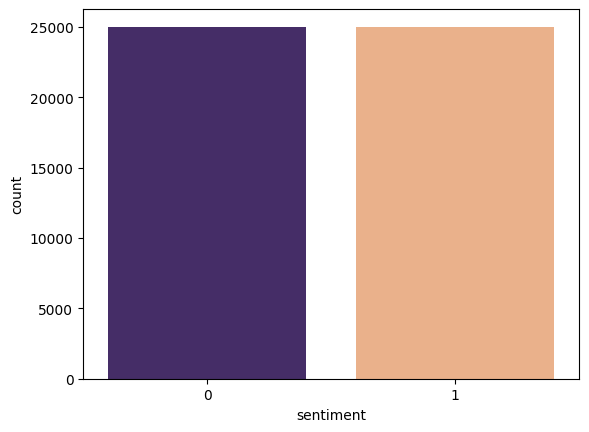

In [14]:
# To see the distribution of the sentiment

%matplotlib inline
sns.countplot(x='sentiment', data=data, palette=['#432371',"#FAAE7B"])

<hr>

#### This is a perfectly balanced dataset with a 50:50 ratio on the sentiment. Now let's do some visualizations on the text length and how words are distributed in each sentiment.

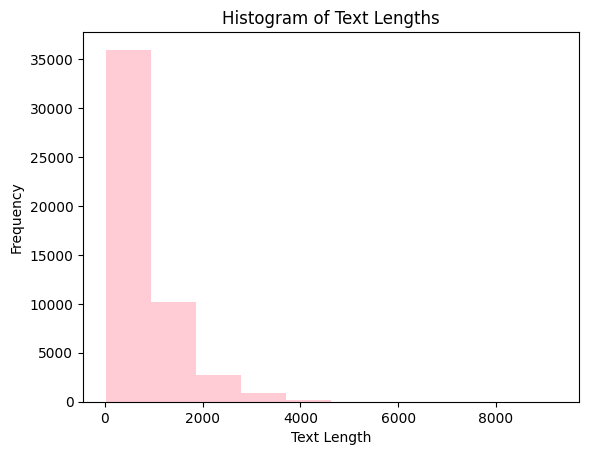

In [15]:
# Compute the text lengths for each review
data['text_length'] = data['preprocessed'].apply(len)

# Plot the histogram of text lengths
plt.hist(data['text_length'], bins=10, color='pink', alpha=0.8)

# Set labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths')

# Display the plot
plt.show()

<hr> 

###### *For reference the WordCloud visuzalization codes are taken from chatGPT.*

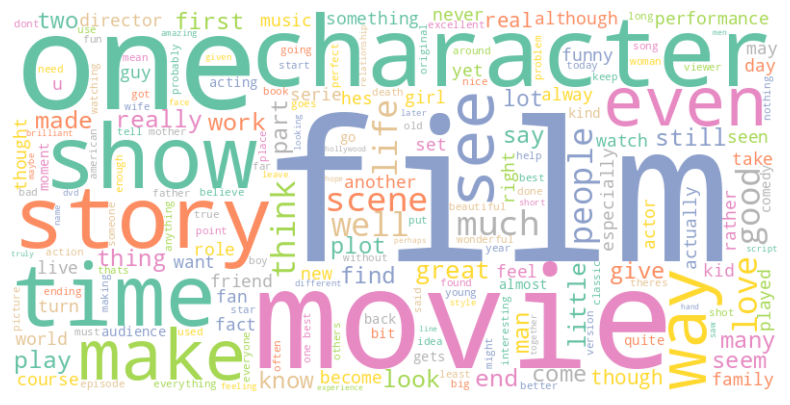

In [16]:
# Create a WordCloud object for positive sentiment
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='Set2').generate(" ".join(data[data.sentiment == 1].preprocessed))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

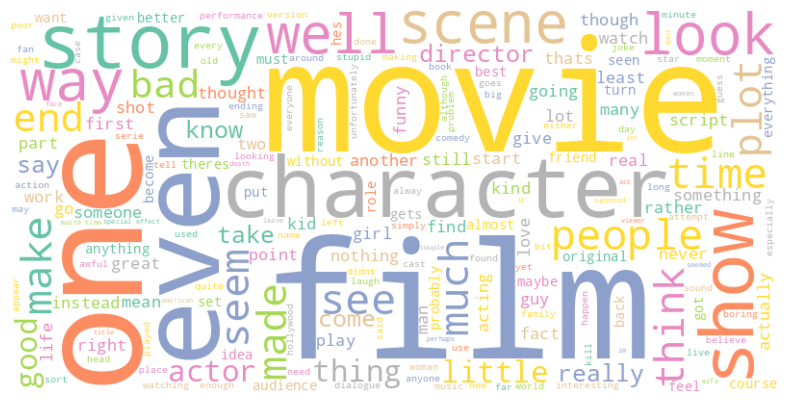

In [17]:
# Create a WordCloud object for negative sentiment
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='Set2').generate(" ".join(data[data.sentiment == 0].preprocessed))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Some words are in common for both sentiments, but there are others that make the difference like: 'good, great, excellent' for positive and 'bad, never' for negative.

<hr> 

## **Train, test, validation data sets**

#### Splitting the dataset into train, test and also validation data to help prevent the overfitting.  


In [18]:
#Creating X

X = data.preprocessed.values.tolist()

In [19]:
#Creating y

y = np.array(data.sentiment.values.tolist())

In [20]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

<hr> 

## **Tokenizer**

#### In order to create the model, we have to do the proper encoding of the data that we have. We will create the tokenizer for encoding the text into numerical values with `texts_to_sequences` method. 
#### `"<OOV>"` token is used to represent any word that is not found in the tokenizer's vocabulary and it stands for "Out-Of-Vocabulary". During the tokenization process, the Tokenizer class builds a vocabulary based on the input text data. It assigns a unique index to each word in the vocabulary, starting from 1. However, there may be words in the validation or testing data that were not present in the training data and thus are not part of the vocabulary. These words are considered out-of-vocabulary.

In [22]:
num_words_ = 5000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=num_words_, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

<hr> 

#### We saw before, in the visualization of the text length, that the length of the sentences is not spread in the same way. So, we have to create equal length inputs with `pad_sequences` method. We are choosing the maximum length to 500. 
#### +1 is added because of 0 padding.


In [23]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 500
trunc_type='post'
padding_type='post'

X_train = pad_sequences(X_train, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_valid = pad_sequences(X_valid, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_test = pad_sequences(X_test, maxlen=maxlen, truncating= trunc_type, padding=padding_type)

<hr> 

#### For the embedding, we will use the [glove6b50dtxt](https://www.kaggle.com/datasets/watts2/glove6b50dtxt). As we know GloVe word embedding file is being read and processed to create an embeddings dictionary. The embeddings_dictionary will contain word embeddings for the words found in the GloVe file. Each word is associated with its respective vector dimensions, allowing for word embedding lookup during model training.

In [25]:
from google.colab import files
uploaded = files.upload()

Saving glove.6B.50d.txt to glove.6B.50d.txt


In [26]:
embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [28]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

<hr> 

## **Model**

#### Now, we will create a sequential model with an embedding layer followed by two bidirectional LSTM layers. The LSTM layers capture the sequential information in the input data. And, there are two dense layers for classification purposes.

- **Embedding Layer**: is used to convert integer-encoded vocabulary indices into dense vector representations.  It takes several arguments:

  - **vocab_size**: The size of the vocabulary, i.e., the total number of unique words in the input text.
  - **50**: The dimensionality of the dense embedding vectors. Each word will be represented by a vector of length 50.
  - **weights=[embedding_matrix]**: The pre-trained embedding matrix that contains the pre-trained word embeddings. This matrix is used to initialize the embedding layer with the pre-trained weights.
  - **input_length=maxlen**: The length of input sequences, i.e., the maximum number of words in a sequence. Sequences longer than this length will be truncated, and shorter sequences will be padded.
  - **trainable=False**: Setting this parameter to False freezes the embedding layer during training, which means the weights of this layer will not be updated.

- **Two bidirectional LSTM layers** are added to the model. The bidirectional LSTM processes the input sequence in both directions (forward and backward) and combines the outputs. The activation function used by the LSTM units is the hyperbolic tangent (tanh) function.

- **Two dense layers** with sigmoid activation function. The dense layer is a fully connected layer where each neuron is connected to every neuron in the previous layer.


In [29]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           9309450   
                                                                 
 bidirectional (Bidirectiona  (None, 500, 256)         183296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,567,787
Trainable params: 258,337
Non-

In [31]:
# Fitting the model 

h = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
313/313 [==============================] - 45s 104ms/step - loss: 0.6694 - accuracy: 0.5901 - val_loss: 0.6604 - val_accuracy: 0.6250
Epoch 2/10
313/313 [==============================] - 31s 99ms/step - loss: 0.5868 - accuracy: 0.6899 - val_loss: 0.5200 - val_accuracy: 0.7460
Epoch 3/10
313/313 [==============================] - 32s 101ms/step - loss: 0.4672 - accuracy: 0.7889 - val_loss: 0.4414 - val_accuracy: 0.7996
Epoch 4/10
313/313 [==============================] - 32s 103ms/step - loss: 0.4198 - accuracy: 0.8126 - val_loss: 0.4127 - val_accuracy: 0.8148
Epoch 5/10
313/313 [==============================] - 31s 100ms/step - loss: 0.4022 - accuracy: 0.8208 - val_loss: 0.4255 - val_accuracy: 0.8088
Epoch 6/10
313/313 [==============================] - 31s 100ms/step - loss: 0.3843 - accuracy: 0.8306 - val_loss: 0.4146 - val_accuracy: 0.8240
Epoch 7/10
313/313 [==============================] - 31s 99ms/step - loss: 0.3656 - accuracy: 0.8417 - val_loss: 0.3657 - val_accu

In [32]:
# Evaluating the model

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

157/157 [==============================] - 4s 25ms/step - loss: 0.3367 - accuracy: 0.8522


<hr>

#### We achieved an accuracy of 85.2% with our model. And now we will experiment on different weight initializers and optimizers and then we will get the accuracies for each combination. The optimizer is Adam and Glorot Uniform Initilizer as default.
#### First we will build these helpful functions `build_model` and `plot_graph` that will be using during the experiment. 

###### *For reference these functions are taken from ChatGPT*

In [33]:
def build_model(op, kl):
    temp_model = Sequential()
    embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
    temp_model.add(embedding_layer)
    temp_model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True, kernel_initializer=kl)))
    temp_model.add(Bidirectional(LSTM(32, activation='tanh', kernel_initializer=kl)))
    temp_model.add(Dense(16, activation='sigmoid', kernel_initializer=kl))
    temp_model.add(Dense(1, activation='sigmoid', kernel_initializer=kl))
    temp_model.compile(optimizer=op, loss="binary_crossentropy",  metrics=["accuracy"])
    return temp_model

In [36]:
def plot_graph(hi):
    plt.plot(hi.history['accuracy'])
    plt.plot(hi.history['val_accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

    plt.plot(hi.history['loss'])
    plt.plot(hi.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

<hr> 

## **Experimenting**
### Adam Optimizer + Glorot Normal Initialization
**Adam** is an adaptive optimization algorithm that combines the benefits of two other optimization methods: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). It adapts the learning rate for each parameter based on the average of past gradients, incorporates momentum, and performs bias correction. 

**The Glorot normal initialization**, also known as Xavier initialization, is a weight initialization technique designed to address the challenges of properly initializing the weights in neural networks. It initializes the weights with values drawn from a normal distribution with zero mean and a specific variance. The variance is calculated based on the number of input and output neurons of a layer, aiming to ensure a good balance between the forward and backward propagations of signals during training.

157/157 [==============================] - 4s 26ms/step - loss: 0.3274 - accuracy: 0.8602


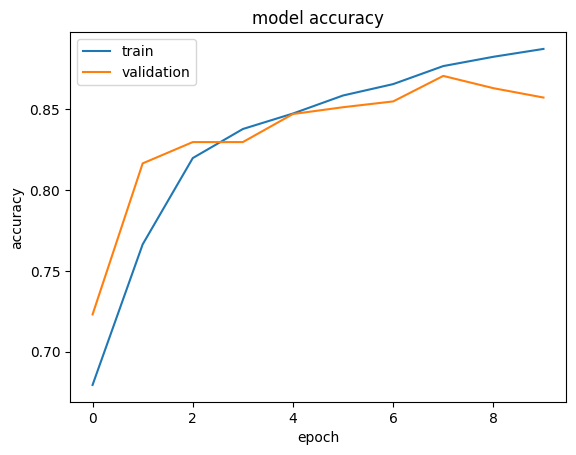

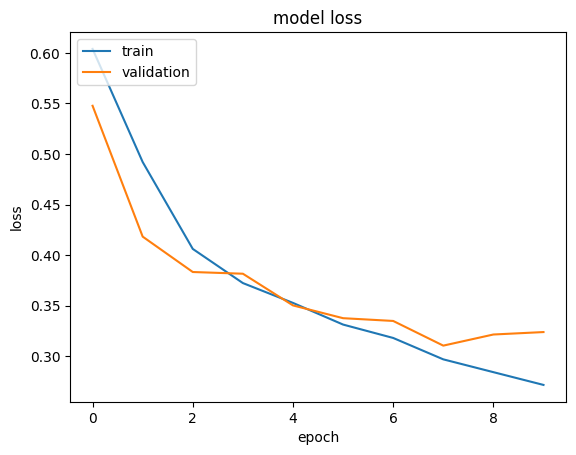

In [37]:
adam_glorot_nor = build_model('adam', 'glorot_normal')
adam_glorot_nor_history = adam_glorot_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
adam_glorot_nor_loss, adam_glorot_nor_accuracy = adam_glorot_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(adam_glorot_nor_history)

<hr>

### Adam Optimizer + He Uniform Initialization

**The He uniform initialization** is a weight initialization technique, also known as He initialization, designed to address the vanishing/exploding gradients problem in deep neural networks. It initializes the weights using a uniform distribution centered at zero with a specific variance. The variance is calculated based on the number of input neurons of a layer, aiming to ensure that the variance of the weights remains consistent across layers, thus promoting better signal flow during training.

157/157 [==============================] - 4s 25ms/step - loss: 0.3285 - accuracy: 0.8672


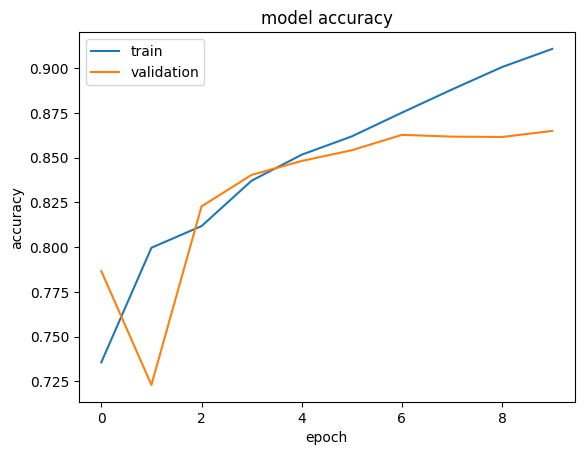

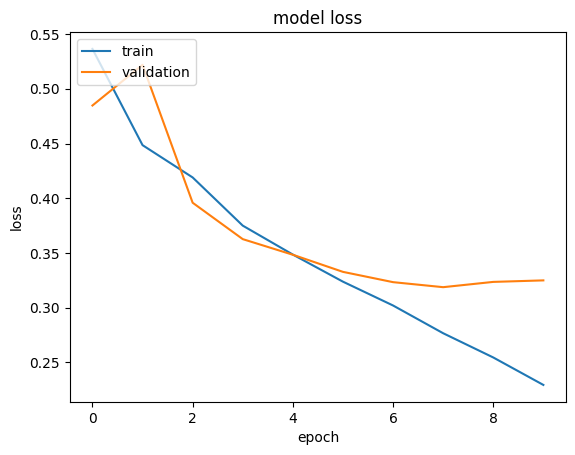

In [38]:
adam_he_uni = build_model('adam', 'he_uniform')
adam_he_uni_history = adam_he_uni.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
adam_he_uni_loss, adam_he_uni_accuracy = adam_he_uni.evaluate(X_test, y_test, verbose=1)
plot_graph(adam_he_uni_history)

<hr>

### Adam Optimizer + He Normal Initialization

**The He normal initialization**, also known as He initialization, is a weight initialization technique designed to address the vanishing/exploding gradients problem in deep neural networks. It initializes the weights with values drawn from a normal distribution with zero mean and a specific variance. The variance is calculated based on the number of input neurons of a layer, aiming to ensure that the variance of the weights remains consistent across layers, promoting better signal flow during training.

157/157 [==============================] - 4s 25ms/step - loss: 0.3251 - accuracy: 0.8674


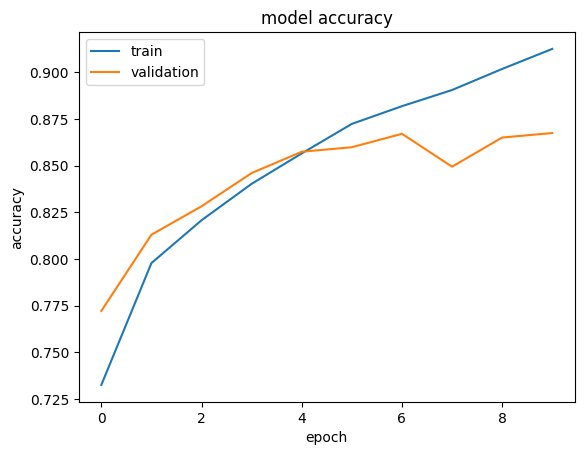

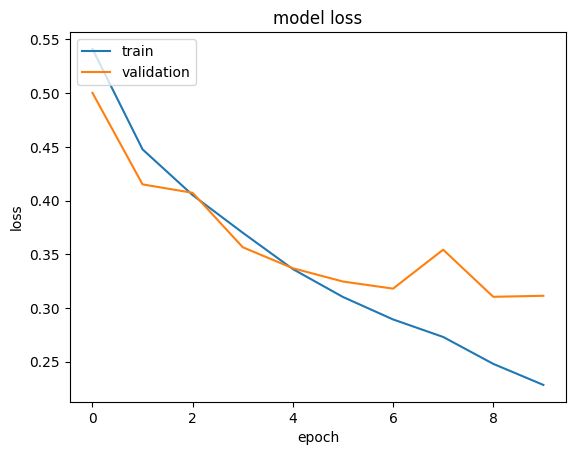

In [39]:
adam_he_nor = build_model('adam', 'he_normal')
adam_he_nor_history = adam_he_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
adam_he_nor_loss, adam_he_nor_accuracy = adam_he_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(adam_he_nor_history)

<hr>

### Adam Optimizer + LeCun Normal Initialization

**The LeCun normal initialization**, also known as LeCun initialization, is a weight initialization technique designed to improve the training of deep neural networks. It initializes the weights with values drawn from a normal distribution with zero mean and a specific variance. The variance is calculated based on the number of input neurons of a layer, taking into account the activation function used in that layer. 

157/157 [==============================] - 4s 26ms/step - loss: 0.3486 - accuracy: 0.8496


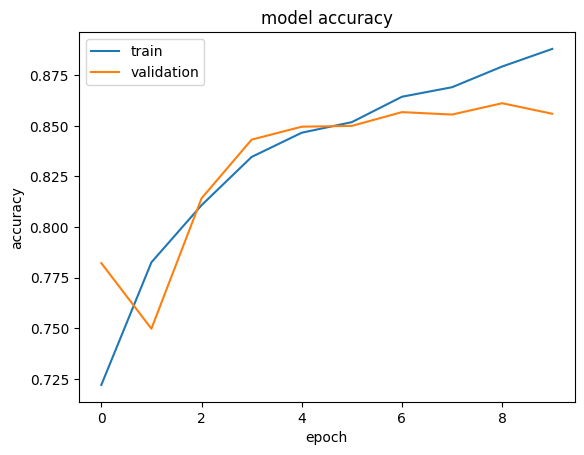

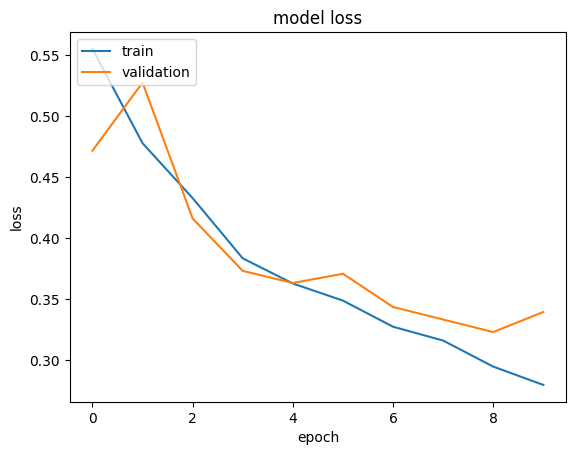

In [40]:
adam_lecun_nor = build_model('adam', 'lecun_normal')
adam_lecun_nor_history = adam_lecun_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
adam_lecun_nor_loss, adam_lecun_nor_accuracy = adam_lecun_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(adam_lecun_nor_history)

<hr>

### Adam Optimizer + Glorot Uniform Initialization

**The Glorot uniform initialization**, also known as Xavier initialization, is a weight initialization technique designed to ensure the proper initialization of weights in neural networks. It initializes the weights using a uniform distribution with specific bounds. The bounds are calculated based on the number of input and output neurons of a layer, aiming to ensure a good balance between the forward and backward propagations of signals during training.

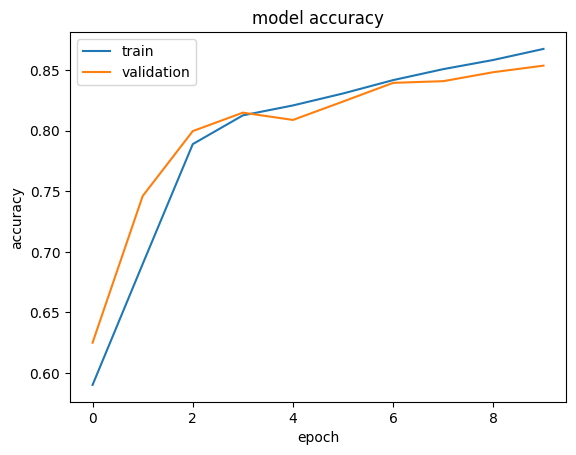

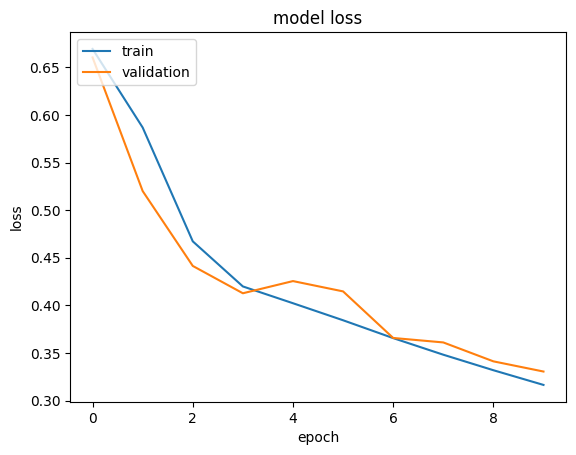

In [42]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

<hr>

### SGD Optimizer + Glorot Uniform  Initialization

**SGD** is a popular optimization algorithm widely used in training neural networks. It updates the model's weights iteratively based on the gradients computed from a small subset of training samples (a mini-batch). SGD applies the negative gradient multiplied by a learning rate to update the weights and iterates over the training data multiple times (epochs) to optimize the model's performance.

**The Glorot uniform initialization**, also known as Xavier initialization, is a weight initialization technique designed to ensure proper initialization of weights in neural networks. It initializes the weights using a uniform distribution with specific bounds. The bounds are calculated based on the number of input and output neurons of a layer, aiming to ensure a good balance between the forward and backward propagations of signals during training.

157/157 [==============================] - 4s 28ms/step - loss: 0.6778 - accuracy: 0.5564


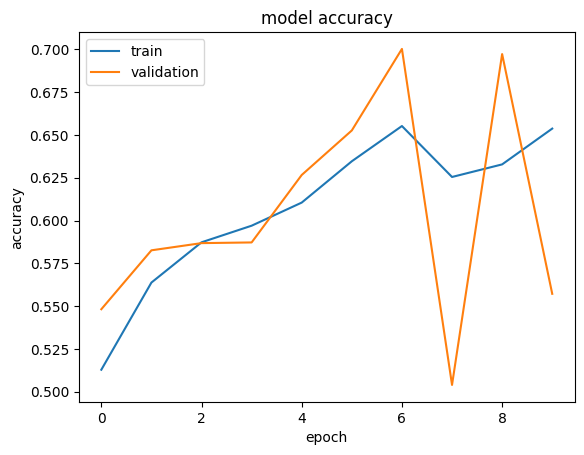

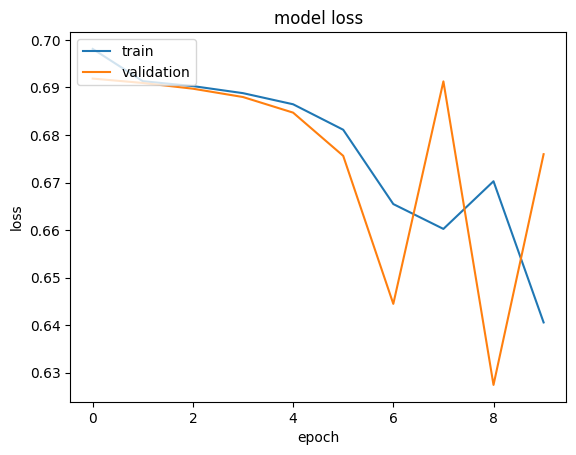

In [44]:
sgd_glorot_uni = build_model('sgd', 'glorot_uniform')
sgd_glorot_uni_history = sgd_glorot_uni.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_glorot_uni_loss, sgd_glorot_uni_accuracy = sgd_glorot_uni.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_glorot_uni_history)

<hr>

### SGD Optimizer + Glorot Normal Initialization

For not being repetitive, the explanations are above for each initializator and the optimizer. 

157/157 [==============================] - 4s 25ms/step - loss: 0.5962 - accuracy: 0.7140


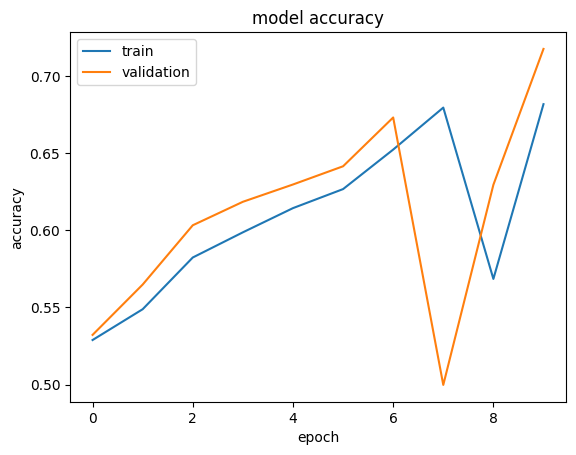

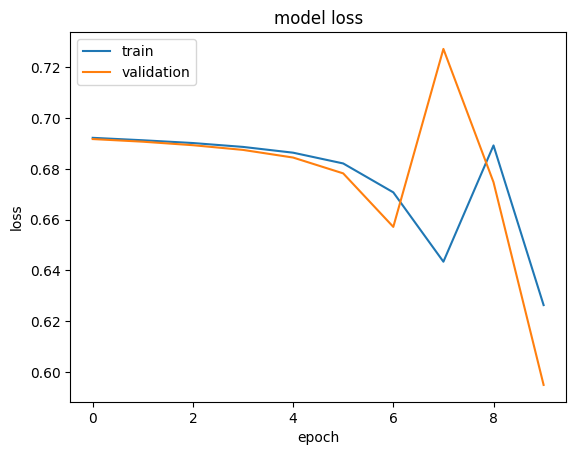

In [45]:
sgd_glorot_nor = build_model('sgd', 'glorot_normal')
sgd_glorot_nor_history = sgd_glorot_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_glorot_nor_loss, sgd_glorot_nor_accuracy = sgd_glorot_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_glorot_nor_history)

<hr>

### SGD Optimizer + He Uniform Initialization

157/157 [==============================] - 4s 26ms/step - loss: 0.6900 - accuracy: 0.5512


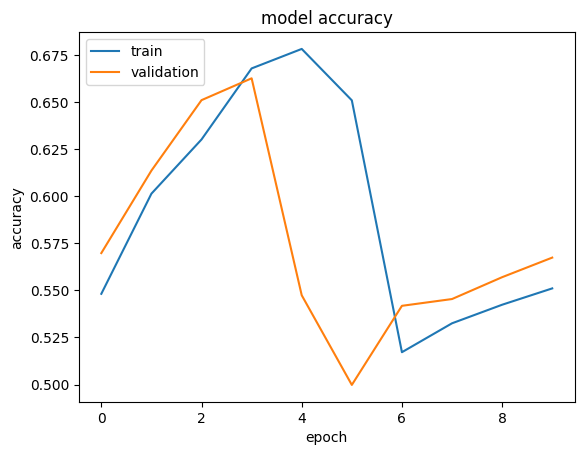

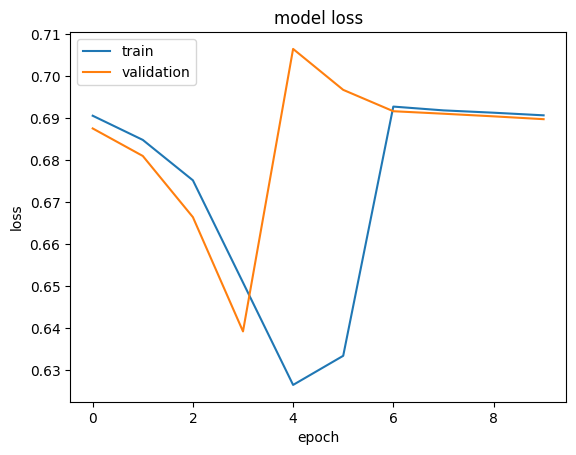

In [46]:
sgd_he_uni = build_model('sgd', 'he_uniform')
sgd_he_uni_history = sgd_he_uni.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_he_uni_loss, sgd_he_uni_accuracy = sgd_he_uni.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_he_uni_history)

<hr>

### SGD Optimizer + He Normal Initialization

157/157 [==============================] - 4s 28ms/step - loss: 0.6101 - accuracy: 0.6906


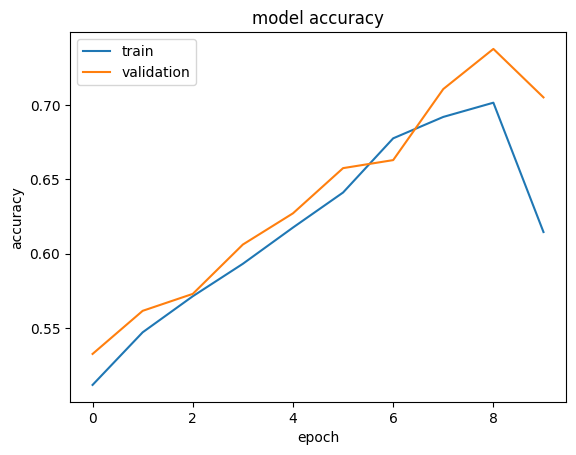

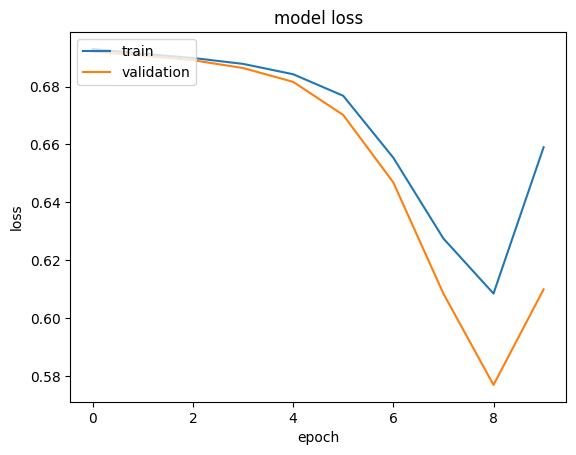

In [47]:
sgd_he_nor = build_model('sgd', 'he_normal')
sgd_he_nor_history = sgd_he_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_he_nor_loss, sgd_he_nor_accuracy = sgd_he_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_he_nor_history)

<hr>

### SGD Optimizer + LeCun Normal Initialization

157/157 [==============================] - 5s 30ms/step - loss: 0.6865 - accuracy: 0.6138


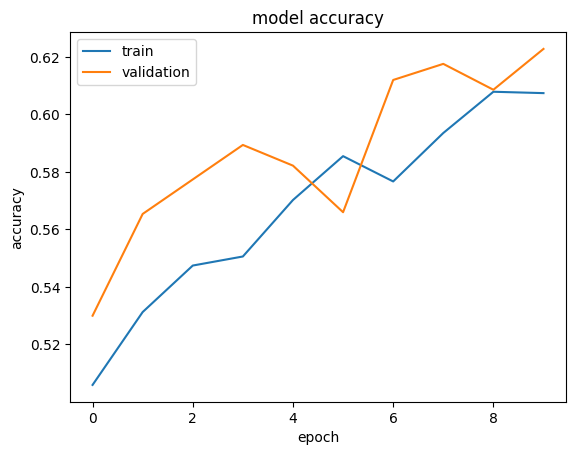

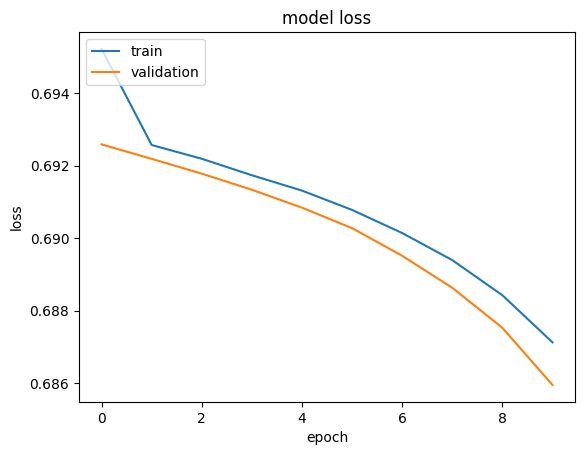

In [48]:
sgd_lecun_nor = build_model('sgd', 'lecun_normal')
sgd_lecun_nor_history = sgd_lecun_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_lecun_nor_loss, sgd_lecun_nor_accuracy = sgd_lecun_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_lecun_nor_history)

<hr>

## **Benchmark (wrapping up together)**

#### Below we have included all the accuracies in the same table for Adam optimizer and 5 initilizers and also another table for SGD optimizer and 5 initilizers.

In [49]:
initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal']
adam_test_accuracy = [test_accuracy, adam_glorot_nor_accuracy, adam_he_uni_accuracy, 
                      adam_he_nor_accuracy, adam_lecun_nor_accuracy]
adam_test_loss = [test_loss, adam_glorot_nor_loss, adam_he_uni_loss, 
                  adam_he_nor_loss, adam_lecun_nor_loss]
adam_test_acc_loss = pd.DataFrame({'Kernel Initializer': initializer, 'Test Accuracy': adam_test_accuracy, 'Test Loss': adam_test_loss})

In [50]:
adam_test_acc_loss

,Kernel Initializer,Test Accuracy,Test Loss
0,Glorot uniform,0.8522,0.336662
1,Glorot normal,0.8602,0.327445
2,He uniform,0.8672,0.328472
3,He normal,0.8674,0.325148
4,LeCun normal,0.8496,0.348566


### Building the plots for training & validation accuracies for ADAM Optimizer and initilizers

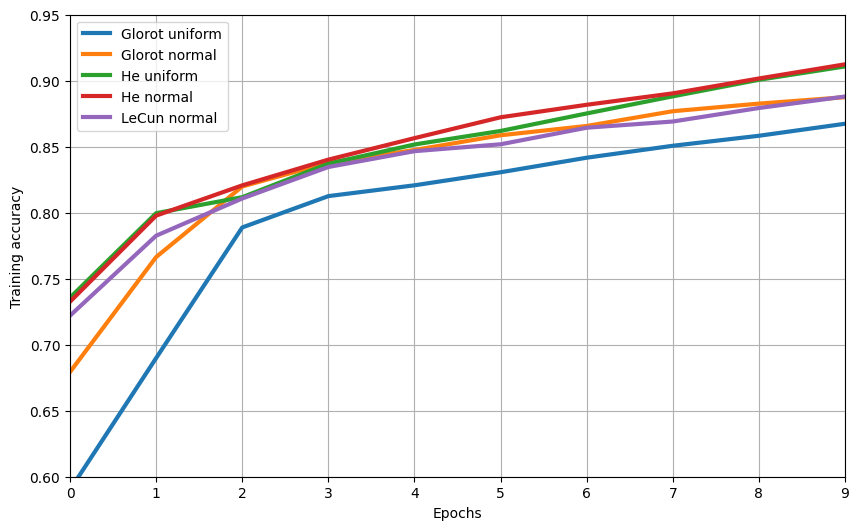

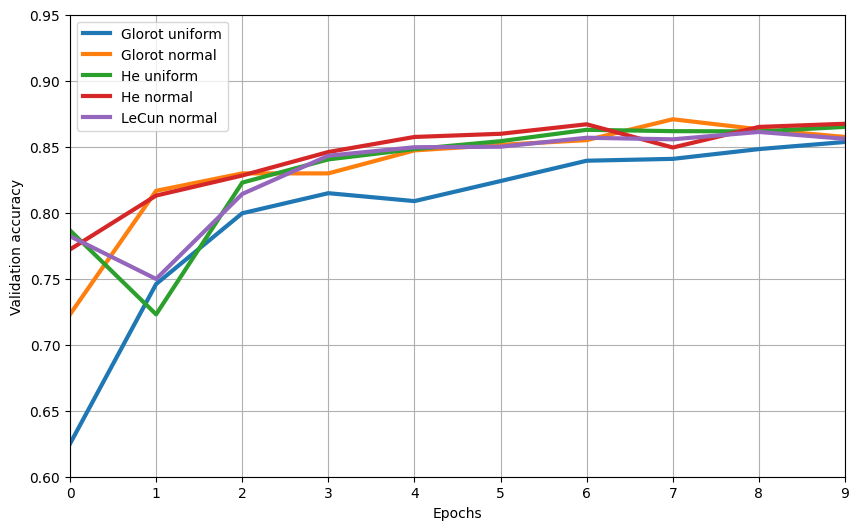

In [52]:
for accuracy in ("accuracy", "val_accuracy"):
    plt.figure(figsize=(10, 6))
    initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal']
    for history, initializer in zip((h, adam_glorot_nor_history, adam_he_uni_history, 
                                  adam_he_nor_history, adam_lecun_nor_history),
                                 initializer):
        plt.plot(history.history[accuracy], label=f"{initializer}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"accuracy": "Training accuracy", "val_accuracy": "Validation accuracy"}[accuracy])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.6, 0.95])
    plt.show()

### Building the plots for training & validation accuracies for SGD Optimizer and initilizers

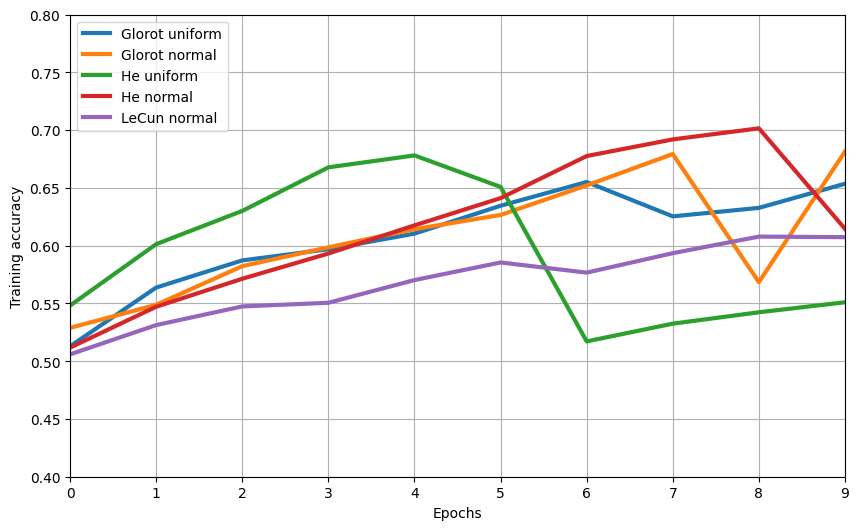

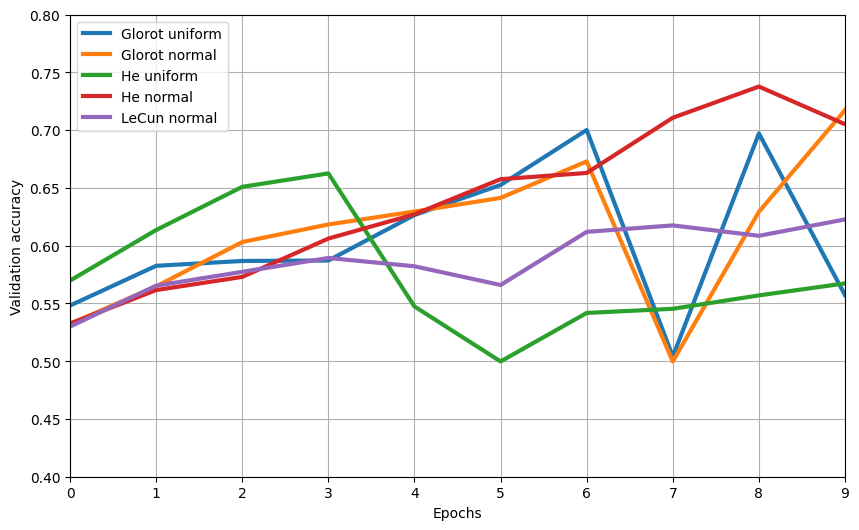

In [53]:
for accuracy in ("accuracy", "val_accuracy"):
    plt.figure(figsize=(10, 6))
    initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal']
    for history, initializer in zip((sgd_glorot_uni_history, sgd_glorot_nor_history, sgd_he_uni_history, 
                                  sgd_he_nor_history, sgd_lecun_nor_history),
                                 initializer):
        plt.plot(history.history[accuracy], label=f"{initializer}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"accuracy": "Training accuracy", "val_accuracy": "Validation accuracy"}[accuracy])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.4, 0.8])
    plt.show()

In [54]:
initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal']
sgd_test_accuracy = [sgd_glorot_uni_accuracy, sgd_glorot_nor_accuracy, sgd_he_uni_accuracy, 
                      sgd_he_nor_accuracy, sgd_lecun_nor_accuracy]
sgd_test_loss = [sgd_glorot_uni_loss, sgd_glorot_nor_loss, sgd_he_uni_loss, 
                  sgd_he_nor_loss, sgd_lecun_nor_loss]
sgd_test_acc_loss = pd.DataFrame({'Kernel Initializer': initializer, 'Test Accuracy': sgd_test_accuracy, 'Test Loss': sgd_test_loss})

In [55]:
sgd_test_acc_loss

,Kernel Initializer,Test Accuracy,Test Loss
0,Glorot uniform,0.5564,0.677822
1,Glorot normal,0.7140,0.596180
2,He uniform,0.5512,0.689995
3,He normal,0.6906,0.610064
4,LeCun normal,0.6138,0.686535


## **Conclusion**

#### During this project we get hands-on experience on using deep learning and fine-tuning a model. This project was very useful to us because we were expecting that SGD to be better in terms of accuracies for a simple problem like that, because the dataset was spreaded equally but no. It depends on the specific cases and all we have to do is to experiment and find the best that will work for our case.

#### Optimizers and initilizers should not be neglected, because in the same model they performed so different, so we should always take them into consideration in order to have a better accuracy for our models.

#### The model that performed better was with Adam Optimizer and He Normal Initilizer with 86.74% accuracy and the lowest loss of 0.325148. 

#### While on the other hand, the model that performed poorly was with SGD Optimizer and He Uniform Initializer and the highest loss of 0.689995.

##### *<span style="color: gray;">Our project was done in Google Collab because we used the GPU there, and it took a lot of time for the codes to run. Some of the explanations are also given in comments inside the code cells. For reference, we have taken some codes from ChatGPT, class notebooks 02E_optimizers and the official links of initializators.</span>*


# Thank you! 